# API Communication Channels

__Learning Objectives:__

At the end of the tutorial, the user should be able to

* Describe what are GridAPPS-D Topics
* Explain the difference between `/queue/` and `/topic/` channels
* Import and use the GridAPPSD-Python library of topics
* Differentiate between static and dynamic topics
* Implement shortcut functions for creating GridAPPS-D Topics

## Getting Started

Before running any of the sample routines in this tutorial, it is first necessary to start the GridAPPS-D Platform and establish a connection to this notebook so that we can start passing calls to the API.

_Open the Ubuntu terminal and start the GridAPPS-D Platform if it is not running already:_

`cd gridappsd-docker`

~/gridappsd-docker$ `./run.sh -t develop`

_Once containers are running,_

gridappsd@[container]:/gridappsd$ `./run-gridappsd.sh`

In [1]:
# Establish connection to GridAPPS-D Platform:
from gridappsd import GridAPPSD
gapps = GridAPPSD("('localhost', 61613)", username='system', password='manager')

# Use generic simulation_id - this would be obtained from Simulation API
simulation_id = '12345678'

---

## Table of Contents

* [1. What are Channels?](#1.-What-are-Channels-in-GridAPPS-D?)
* [2. /queue/ vs /topic/](#2.-/queue/-vs-/topic/)
	* [2.1. Queue Channels](#2.1.-Queue-Channels)
    * [2.2. Topic Channels](#2.2.-Topic-Channels)
* [3. Static GridAPPS-D Topics](#3.-Static-GridAPPS-D-Topics)
    * [3.1. Request PowerGrid Model Data](#3.1.-Request-PowerGrid-Model-Data)
    * [3.2. Request Timeseries Data](#3.2.-Request-Timeseries-Data)
    * [3.3. Request Platform Status](#3.3.-Request-Platform-Status)
    * [3.4. Querying Log Data](#3.4.-Querying-Log-Data)
    * [3.5. Subscribing to Platform Logs](#3.5.-Subscribing-to-Platform-Logs)
* [4. GridAPPS-D Python Topic Functions](#4.-GridAPPSD-Python-Topics-Functions)
    * [4.1. Subscribe to Simulation Output](#4.1.-Subscribe-to-Simulation-Output)
    * [4.2. Publish to Simulation Input](#4.2.-Publish-to-Simulation-Input)
    * [4.3. Subscribe to Simulation Logs](#4.3.-Subscribe-to-Simulation-Logs)
    * [4.4. Subscribe to Application Output](#4.3.-Subscribe-to-Application-Output)
    * [4.5. Publish to Application Input](#4.4.-Subscribe-to-Application-Input)
    * [4.6. Subscribe to Service Output](#4.3.-Subscribe-to-Service-Output)
    * [4.7. Publish to Service Input](#4.4.-Subscribe-to-Service-Input)

---

## 1. What are Channels in GridAPPS-D?

When communicating with the GridAPPS-D Platform through API, it is necessary to specify a communication channel, which tells the GridAPPS-D platform on which channel to communicate with the application and through which API the message should be directed.

---

## 2. `/queue/` vs `/topic/`

GridAPPS-D uses two types of communication channels to determine the visibility of the API call to other applications and services.

## 2.1. Queue Channels

`/queue/` is used for communication channels where only the GridAPPS-D Platform is listening to the API call. These API calls are processed on a first-in, first-out basis. There is only one subscriber to the communication channel.

API calls to the Blazegraph database, Logs, Timeseries database, Config files, and Platform status are all queue channels. All the GridAPPS-D Topics for queue channels typically do not change over the course of an application or simulation run.

In the GridAPPSD-Python library, it is assumed that a topic is a queue channel if not otherwise specified. These two GridAPPS-D Topic definitions are equivalent:

`topic = '/queue/goss.gridappsd.process.request.data.powergridmodel'`

`topic = 'goss.gridappsd.process.request.data.powergridmodel'`


## 2.2. Topic Channels

`/topic/` is used for communication channels where the API call is to broadcast to all subscribers through the GOSS Message Bus, inlcuding other applications, services, FNCS Bridge, etc. 

API calls to the Simulation, services, and active applications use topic channels to communicate and typically need to the specify the Simulation ID, Service ID, and Application ID. The particular topic for such an API call will change between simulations and instances, and so shortcut functions are provided in GridAPPSD-Python library to assist in generating the correct Topic.

In GridAPPSD-Python, it is necessary to specify if a GridAPPS-D Topic is a `/topic/` channel broadcasting to all subscribers:

`topic = "/topic/goss.gridappsd.simulation.input."+simulation_id`

[[Return to Top](#Table-of-Contents)]

---

## 3. Static GridAPPS-D Topics

Below are a list of the most common topics and where they are used. The appropriate topic for each API call will also be listed again in the subsequent lessons on each GridAPPS-D API. The list below can serve as an additional convenient reference.

These topics remain the remain the same between platform, application, and simulation instances. The GridAPPSD-Python Library shortcuts use all uppercase naming to indicate that these are static topic names.

### Importing the Topics Library

When using topics in GridAPPSD-Python, it is recommended to import the `topics` library from `gridappsd`. This enables you to rapidly call the correct topic without needing to search for the correct topic string. This also protects your code from any changes inside the GridAPPS-D Platform if particular topic strings are deprecated or replaced -- the python library names will stay persistent between all Platform releases.

For static GridAPPS-D topics, import the library by running

In [ ]:
from gridappsd import topics as t

If you try to call the topic methods or functions without importing the topics library, your code will return an error:

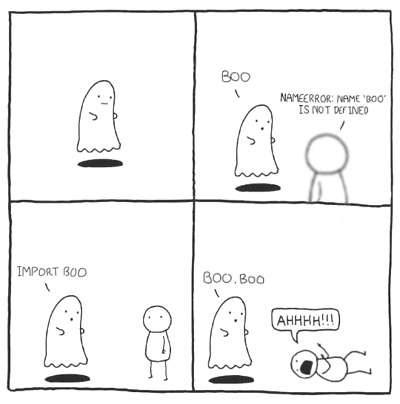

### 3.1. Request PowerGrid Model Data

This `/queue/` channel is used to communicate with PowerGrid Model API to pull power system model info from the the Blazegraph Database. The PowerGrid Model API is covered in detail in Lessons 2.2 and 2.3. 

The base static string used is `goss.gridappsd.process.request.data.powergridmodel`, which can be called using the `.REQUEST_POWERGRID_DATA` or `.BLAZEGRAPH` methods from the topics library

A sample message that would be passed with this topic is 

In [2]:
from gridappsd import topics as t

# Sample PowerGrid Model message, explained in Lesson 2.2.
message = '{"requestType": "QUERY_MODEL_NAMES", "resultFormat": "JSON"}'

gapps.get_response(t.REQUEST_POWERGRID_DATA, message)

{'data': {'modelNames': ['_204AC68D-C4B3-4D93-A2B5-B1C195C49954',
   '_49AD8E07-3BF9-A4E2-CB8F-C3722F837B62',
   '_4F76A5F9-271D-9EB8-5E31-AA362D86F2C3',
   '_503D6E20-F499-4CC7-8051-971E23D0BF79',
   '_5B816B93-7A5F-B64C-8460-47C17D6E4B0F',
   '_67AB291F-DCCD-31B7-B499-338206B9828F',
   '_77966920-E1EC-EE8A-23EE-4EFD23B205BD',
   '_9CE150A8-8CC5-A0F9-B67E-BBD8C79D3095',
   '_AAE94E4A-2465-6F5E-37B1-3E72183A4E44',
   '_C1C3E687-6FFD-C753-582B-632A27E28507',
   '_E407CBB6-8C8D-9BC9-589C-AB83FBF0826D']},
 'responseComplete': True,
 'id': '365753873'}

In [ ]:
from gridappsd import topics as t

# Sample PowerGrid Model message, explained in Lesson 2.2.
message = '{"requestType": "QUERY_MODEL_NAMES", "resultFormat": "JSON"}'

gapps.get_response(t.BLAZEGRAPH, message)

[[Return to Top](#Table-of-Contents)]

---

### 3.2. Request Timeseries Data

This `/queue/` channel is used to communicate with the Timeseries API and Timeseries database, which stores real-time and historical data, such as weather information and AMI meter readings. The Timeseries database is covered in detail in Lesson 2.XX. A sample message that would be passed with this topic is

__Text String:__ The topic can be specified as a static string:

* `topic = "goss.gridappsd.process.request.data.timeseries"`
* `gapps.get_response(topic, message)`

__GridAPPSD-Python Library Method:__ The correct topic can also be imported from the GridAPPSD-Python topics library:

* `from gridappsd import topics as t`
* `gapps.get_response(t.TIMESERIES, message)`

[[Return to Top](#Table-of-Contents)]

---

### 3.3. Request Platform Status

This topic is used to check that status of the GridAPPS-D Platform. 



__Text String:__ The topic can be specified as a static string:

* `topic = "/queue/goss.gridappsd.process.request.status.platform"`
* `gapps.get_response(topic, message)`

__GridAPPSD-Python Library Method:__ The correct topic can also be imported from the GridAPPSD-Python topics library. 

* `from gridappsd import topics as t`
* `gapps.get_response(t.PLATFORM_STATUS, message)`

[[Return to Top](#Table-of-Contents)]

---

### 3.4. Querying Log Data

This topic is used to query log data in the MySQL Database using the Logging API

__Note:__ This topic is different from the one used to subscribe to real-time log data being published by an ongoing simulation. This topic is used for querying data already stored in the database.

__Text String:__ The topic can be specified as a static string:

* `topic = "goss.gridappsd.process.request.data.log"`
* `gapps.get_response(topic, message)`

__GridAPPSD-Python Library Method:__ The correct topic can also be imported from the GridAPPSD-Python topics library:

* `from gridappsd import topics as t`
* `gapps.get_response(t.LOGS, message)`

[[Return to Top](#Table-of-Contents)]

---

### 3.5. Subscribing to Platform Logs

This topic is used to subscribe the to logs created by the GridAPPS-D Platform, such as which managers and core services have been started and are running.

__Text String:__ The topic can be specified as a static string:

* `topic = "goss.gridappsd.process.request.data.timeseries"`
* `gapps.get_response(topic, message)`


__GridAPPSD-Python Library Function:__ The correct topic can also be imported from the GridAPPSD-Python topics library. Note that this is a python function similar to the dynamic topics presented in the next section.

* `from gridappsd.topics import platfor_log_topic
* `topic = platform_log_topic()`
* `gapps.get_response(topic, message)`

[[Return to Top](#Table-of-Contents)]

---

## 4. Dynamic GridAPPS-D Topics

Several GridAPPS-D topics are unique to each application, simulation, or service instance. These topics are dynamic and will change from instance to instance. 

The GridAPPS-D Platform will require that the topic specify the particular instance so that the API call can be delivered to the correct simulation or service. 

To assist with the task of creating a dynamic topic that automatically updates between instances, several function are available in the GridAPPSD-Python topics library.

The available GridAPPSD-Python functions for dynamic topics are

* `simulation_input_topic(simulaton_id)` -- Gets the topic to write data to for the simulation


* `simulation_output_topic(simulation_id)` -- Gets the topic for subscribing to output from the simulation


* `simulation_log_topic(simulation_id)` -- Topic for the subscribing to the logs from the simulation


* `service_input_topic(service_id, simulation_id)` -- Utility method for getting the input topic for a specific service


* `service_output_topic(service_id, simulation_id)` -- Utility method for getting the output topic for a specific service


* `application_input_topic(application_id, simulation_id)` -- Utility method for getting the input topic for a specific application


* `application_output_topic(application_id, simulation_id)` -- Utility method for getting the output topic for a specific application


[[Return to Top](#Table-of-Contents)]

---

### 4.1. Subscribe to Simulation Output

This topic is used to communicate with the Simulation API, which is covered in detail in Lesson XX. The Simulation Output Topic is used to subscribe to the simulation output, enabling applications to listen to switching actions, obtain equipment measurements, and so on. 

The GridAPPSD-Python shortcut function for generating the correct topic is

`simulation_output_topic(simulation_id)`

There are two ways to use the function. The first is to call the library function directly. The second is to use it as part of a class definition.

__1) Call the topic function directly__

In [ ]:
# Import GridAPPS-D Topic Function:
from gridappsd.topics import simulation_output_topic

# Call GridAPPSD-Python Topic Function
topic = simulation_output_topic(simulation_id)

# Print to Notebook Kernel:
print(topic)

__2) Use the topic function in a class definition__

In [ ]:
# Import GridAPPS-D Topic Function:
from gridappsd.topics import simulation_output_topic

# Define Subscription Class
class MySubscription(object):
    def __init__(self,simulation_id):
        self._subscribe_to_topic = simulation_output_topic(simulation_id)
        
# Define Main Function: 
def _main():
    subscription = MySubscription(simulation_id)
    print(subscription._subscribe_to_topic)
    
# Call Main Function:
_main()

[[Return to Top](#Table-of-Contents)]

---

### 4.2. Publish to Simulation Input

This topic is used to communicate with the Simulation API, which is covered in detail in Lesson XX. The Simulation Input Topic is used to publish commands to the GOSS Message Bus, which are then broadcast to all applications, services, and simulations that are listening. Examples of actions that will use this topic include taking switching actions, adjusting DER setpoints, and changing regulator taps.

The GridAPPSD-Python shortcut function for generating the correct topic is

`simulation_input_topic(simulation_id)`

There are two ways to use the function. The first is to call the library function directly. The second is to use it as part of a class definition.

__1) Call the topic function directly__

In [ ]:
# Import GridAPPS-D Topic Function:
from gridappsd.topics import simulation_input_topic

# Call GridAPPSD-Python Topic Function
topic = simulation_output_topic(simulation_id)

# Print to Notebook Kernel:
print(topic)

__2) Use the topic function in a class definition__

In [ ]:
# Import GridAPPS-D Topic Function:
from gridappsd.topics import simulation_input_topic

# Define Subscription Class
class MySimulationPublisher(object):
    def __init__(self,simulation_id):
        self._publish_to_topic = simulation_input_topic(simulation_id)
        
# Define Main Function: 
def _main():
    subscription = MySimulationPublisher(simulation_id)
    print(subscription._publish_to_topic)
    
# Call Main Function:
_main()

[[Return to Top](#Table-of-Contents)]

---

### 4.3. Subscribe to Simulation Logs

This topic is used to communicate with the Simulation API, which is covered in detail in Lesson XX. The Simulation Output Topic is used to subscribe to the simulation output, which applications use to
* Listen to switching actions
* Obtaining equipment measurements
* ___GET FULL LIST___

The GridAPPSD-Python shortcut function for generating the correct topic is

`simulation_output_topic(simulation_id)`

There are two ways to use the function. The first is to call the library function directly. The second is to use it as part of a class definition.

__1) Call the topic function directly__

In [ ]:
# Import GridAPPS-D Topic Function:
from gridappsd.topics import simulation_output_topic

# Call GridAPPSD-Python Topic Function
topic = simulation_output_topic(simulation_id)

# Print to Notebook Kernel:
print(topic)

__2) Use the topic function in a class definition__

In [ ]:
# Import GridAPPS-D Topic Function:
from gridappsd.topics import simulation_output_topic

# Define Subscription Class
class MySubscription(object):
    def __init__(self,simulation_id):
        self._subscribe_to_topic = simulation_output_topic(simulation_id)
        
# Define Main Function: 
def _main():
    subscription = MySubscription(simulation_id)
    print(subscription._subscribe_to_topic)
    
# Call Main Function:
_main()

----
# Conclusion

Congratulations! You have reviewed all the static and dynamic topics used by GridAPPS-D. These topics will be presented again in the context of the APIs in which they are used. 

You should now be able to select the correct topic for the most common activities and API calls.

[Return to Top](#Table-of-Contents)

[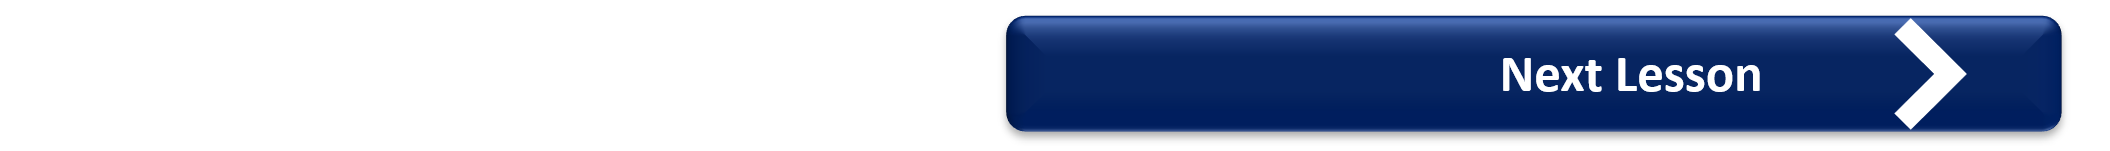](2.2--Lesson-2.2--GridAPPS-D-Architecture.ipynb)

[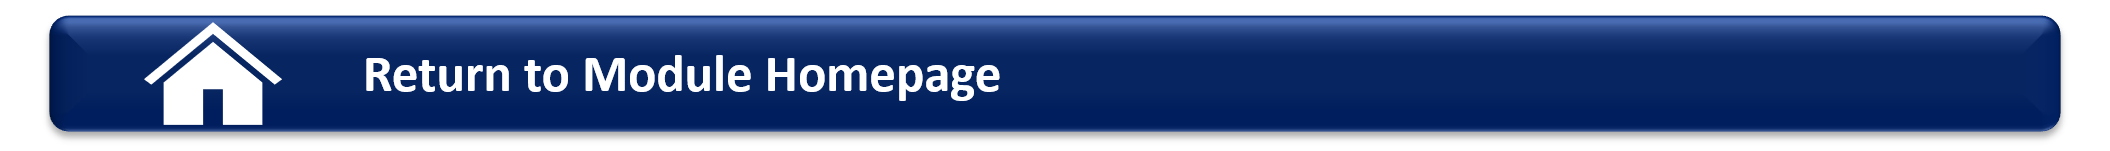](2.0--Module-2--GridAPPS-D-Overview.ipynb)